In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy


In [ ]:
!pip install spacy -U
!python -m spacy download pl_core_news_sm

In [43]:
nlp = spacy.load("pl_core_news_sm")

In [74]:
MAIN_DATA = pd.read_csv("/content/lgbt.csv")

In [75]:
df = MAIN_DATA.copy()

Część 1 - przetwarzanie i czyszczenie danych


1. Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at


In [76]:
df['created_at'] = df['created_at'].replace(regex={"Mon": "Poniedziałek", "Tue": "Wtorek", "Wed": "Środa", "Thu": "Czwartek", "Fri": "Piątek", "Sat": "Sobota", "Sun": "Niedziela"})

In [ ]:
df

2. Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at

In [78]:
df['user_created_at'] = df['user_created_at'].replace(regex={"Jan" : "01", "Feb" : "02", "Mar" : "03", "Apr" : "04", "May" : "05", "Jun" : "06",	"Jul" : "07",	"Aug" : "08",	"Sep" : "09",	"Oct" : "10", "Nov" : "11",	"Dec" : "12"})

In [ ]:
df

3. Pobierz wszystkie linki do tweetów i przekaż je do listy.

In [ ]:
print(df['tweet_url'].values.tolist())

4. Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)

In [ ]:
list =[]
for x in df["urls"]:
  if not pd.isnull(x):
    list.append(x)
print(list)

5. Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).

In [ ]:
list =[]
for x in df["media"]:
  if not pd.isnull(x):
    list.append(x)
print(list)

6. Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords

In [82]:
def remove_stopwords(tekst):
  doc = nlp(tekst)
  result = ""
  for token in doc:
    if token.is_stop == False:
      result += token.text + " "
  return result


In [83]:
df["text_without_stopwords"] = df["text"].apply(remove_stopwords)

Część 2 - eksploracyjna analiza danych

1. Wypisz top5 tweetów z największa liczbą polubień.

In [14]:
df = df.sort_values('favorite_count', ascending = False) 
df[['favorite_count', 'text']][0:5]

,favorite_count,text
9462,1818,Piłkarska Federacja Wysp Owczych wprowadziła z...
4014,1685,Lewica zawarła sojusz z:\n- „LGBT to ideologia...
4052,1447,"To jest niesamowite, jak niektórym się przypom..."
3790,1360,"Hura! Wygrali prawie wszyscy. PiS, bo nie ma k..."
8835,1203,Serdeczne życzenia urodzinowe dla Moniki Rosy ...


2. Wypisz top5 tweetów z największa liczbą retweetów.

In [15]:
df = df.sort_values('retweet_count', ascending = False) 
df[['retweet_count', 'text']][0:5]

,retweet_count,text
3654,2061,A nie dałoby się tak w Polsce: osoby lgbt mogł...
8167,1323,Dziś PRAWDA o #MarszRówności #LGBT. \nProszę o...
34,1031,Znów w UE oskarżają Polskę o „gorszą kulturę”....
3249,1031,Znów w UE oskarżają Polskę o „gorszą kulturę”....
146,1031,Znów w UE oskarżają Polskę o „gorszą kulturę”....


3. Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).

In [106]:
index = np.where((df['possibly_sensitive'] != True) )
df.loc[index]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
0,NaN,Czwartek Apr 29 16:49:26 +0000 2021,,NaN,NaN,0,1387811273010712577,NaN,NaN,NaN,pl,NaN,NaN,NaN,76,1.387715e+18,BartStaszewski,"<a href=""http://twitter.com/download/android"" ...",Z ostatniej chwili🏳️‍🌈 Kraśnik szóstym miastem...,https://twitter.com/SBrycki/status/13878112730...,Sat 04 27 22:18:16 +0000 2013,1385559972,False,29 | He/Him | INFJ/INTP | 4w5 | European | Gay...,41371,222,1220,2,"Kowary, Poland, European Union",Szymon Brycki 🦊♀️🏳️‍🌈🇪🇺,SBrycki,42193,NaN,https://linktr.ee/SzymonBrycki,False,ostatniej chwili 🏳 ️‍ 🌈 Kraśnik szóstym miaste...
1,NaN,Czwartek Apr 29 15:56:37 +0000 2021,,NaN,https://medianarodowe.com/2021/04/28/organizac...,0,1387797982557392911,NaN,NaN,NaN,pl,NaN,False,NaN,43,1.387788e+18,SamnajT,"<a href=""https://mobile.twitter.com"" rel=""nofo...","1,5 MLD EURO NA WSPIERANIE LGBT!\n.\n\nhttps:/...",https://twitter.com/Biezrzad/status/1387797982...,Wed 11 19 19:33:09 +0000 2014,2884615685,False,NaN,63627,175,244,5,NaN,Fullname,Biezrzad,17139,NaN,NaN,False,"1,5 MLD EURO WSPIERANIE LGBT ! \n . \n\n https..."
2,NaN,Czwartek Apr 29 15:54:08 +0000 2021,,NaN,NaN,0,1387797356050063368,NaN,NaN,NaN,pl,NaN,NaN,NaN,76,1.387715e+18,BartStaszewski,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Z ostatniej chwili🏳️‍🌈 Kraśnik szóstym miastem...,https://twitter.com/komuszyca/status/138779735...,Tue 10 01 09:43:34 +0000 2019,1178968638793142273,False,krytyczna obserwatorka i analityczka polityki ...,11775,522,510,0,NaN,Moraczewska 🇵🇱🇪🇺🏳️‍🌈,komuszyca,3799,NaN,NaN,False,ostatniej chwili 🏳 ️‍ 🌈 Kraśnik szóstym miaste...
3,NaN,Czwartek Apr 29 16:06:45 +0000 2021,#lgbt,NaN,NaN,0,1387800529947013121,filippskora,1.387791e+18,1.021095e+18,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@filippskora No nie stosujemy podwójnych stand...,https://twitter.com/LocusSolusToJa/status/1387...,Wed 12 13 09:47:56 +0000 2017,940880961738346496,False,"Gej, lewicowiec, ateista, antyfaszysta. W szcz...",22005,1088,1108,11,"Kraków-Prądnik, Polska",Locus Solus 🏳️‍🌈🇵🇱🇪🇺,LocusSolusToJa,14023,NaN,NaN,False,@filippskora stosujemy podwójnych standardów ....
4,NaN,Czwartek Apr 29 15:49:39 +0000 2021,,NaN,NaN,0,1387796227706720256,NaN,NaN,NaN,pl,NaN,NaN,1.387710e+18,37,1.387711e+18,joannamucha,"<a href=""http://twitter.com/download/android"" ...",Uchwała o strefie wolnej od LGBT w Kraśniku UC...,https://twitter.com/radekdragon1973/status/138...,Fri 01 22 12:54:28 +0000 2021,1352600463225581569,False,"NIGDY NIE PATRZ NA NIKOGO Z GÓRY,CHYBA,ŻE POMA...",9941,1563,2567,4,Ireland,Radek Andrzej Klary,radekdragon1973,5946,NaN,NaN,False,Uchwała strefie wolnej LGBT Kraśniku UCHYLONA ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12151,NaN,Środa Apr 21 13:51:32 +0000 2021,,NaN,NaN,11,1384867398872862720,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...","Czyli w Szwecji jest tak, że migranci gwałcą b...",https://twitter.com/PoPrawnik2/status/13848673...,Tue 03 20 19:06:46 +0000 2018,976173218309509120,False,?,89024,7850,88,22,NaN,PrawnikPoPrawnik,PoPrawnik2,44828,NaN,NaN,False,"Szwecji , migranci gwałcą białe kobiety , migr..."
12152,NaN,Środa Apr 21 13:49:00 +0000 2021,,NaN,NaN,0,1384866764840914945,NaN,NaN,NaN,pl,NaN,NaN,NaN,85,1.384850e+18,BatugWojciech,"<a href=""http://twitter.com/download/android"" ...","Szwedzki działacz lgbt, ekspert od bezpieczneg...",https://twitter.com/

4. Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).

In [105]:
df.loc[df['user_created_at'] == df['user_created_at'].max()]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
10141,NaN,Czwartek Apr 22 19:44:44 +0000 2021,,NaN,NaN,0,1385318674081406980,NaN,NaN,NaN,pl,NaN,NaN,NaN,67,1.385314e+18,Doxycyklina1,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Niedziele bez handlu wprowadzili w interesie K...,https://twitter.com/wchalecki1/status/13853186...,Wed 12 30 22:40:24 +0000 2015,4680168283,False,# Silni_Razem ***** ***,117902,1859,2365,1,NaN,waldemar chalecki,wchalecki1,104173,NaN,NaN,False,Niedziele handlu wprowadzili interesie Kościoł...
6360,NaN,Wtorek Apr 27 09:02:17 +0000 2021,,NaN,NaN,0,1386968936869150727,NaN,NaN,NaN,pl,NaN,NaN,NaN,26,1.386936e+18,tynxik,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Pawłowska nie słyszała słów ""LGBT to ideologia...",https://twitter.com/wchalecki1/status/13869689...,Wed 12 30 22:40:24 +0000 2015,4680168283,False,# Silni_Razem ***** ***,117902,1859,2365,1,NaN,waldemar chalecki,wchalecki1,104173,NaN,NaN,False,"Pawłowska słyszała słów "" LGBT ideologia , lud..."


5. Wyświetl tweety użytkownika. który ma najwięcej followersów.

In [104]:
df = df.sort_values('user_followers_count', ascending = False) 
df[['user_followers_count', 'user_name']][0:1]

,user_followers_count,user_name
244,1531620,tvn24


6. Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)

In [103]:
index = np.where((df['user_verified'] == True) )
df.loc[index]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,text_without_stopwords
49,NaN,Czwartek Apr 29 16:51:12 +0000 2021,#LGBT,https://twitter.com/danutahuebner/status/13878...,http://m.in,7,1387811719393730561,NaN,NaN,NaN,pl,NaN,False,NaN,1,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",Presja popłaca! \n\nRadni Kraśnika uchylili sł...,https://twitter.com/danutahuebner/status/13878...,Fri 10 04 14:28:45 +0000 2013,1934463319,False,"Polka, Europejka, warszawianka. Pierwsza polsk...",7955,22821,1456,294,"Warsaw, Brussels",Danuta Huebner,danutahuebner,15392,NaN,https://danuta-huebner.pl/en/activities-of-pro...,True,Presja popłaca ! \n\n Radni Kraśnika uchylili ...
195,NaN,Czwartek Apr 29 14:08:00 +0000 2021,,NaN,"http://m.in https://wyborcza.pl/7,75398,270280...",19,1387770646659219467,NaN,NaN,NaN,pl,NaN,False,NaN,4,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Kolejny raz spadamy. Ranking @freedomhouse wym...,https://twitter.com/SylwiaSpurek/status/138777...,Wed 12 23 10:25:27 +0000 2015,4577469077,False,Member of the European Parliament / @GreensEFA...,4030,22057,702,157,"Poznań, Polska",Sylwia Spurek,SylwiaSpurek,5757,NaN,https://www.sylwiaspurek.pl/,True,Kolejny spadamy . Ranking @freedomhouse wymien...
244,NaN,Czwartek Apr 29 13:41:52 +0000 2021,,NaN,https://tvn24.pl/bialystok/krasnik-rezygnuje-z...,25,1387764071152427009,NaN,NaN,NaN,pl,NaN,False,NaN,6,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",Radni Kraśnika zmienili zdanie i sami uchylili...,https://twitter.com/tvn24/status/1387764071152...,Wed 04 23 13:12:25 +0000 2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1531620,69,1907,Poland,tvn24,tvn24,320299,NaN,http://www.tvn24.pl,True,Radni Kraśnika zmienili zdanie sami uchylili u...
317,NaN,Czwartek Apr 29 12:44:58 +0000 2021,#Kraśnik,NaN,NaN,7,1387749749621764099,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",#Kraśnik: Rada Miasta uchyliła przyjęte w 2019...,https://twitter.com/RadioZET_NEWS/status/13877...,Wed 04 25 08:52:40 +0000 2012,562800078,False,"Blisko Ciebie, obiektywne i niezależne. Takie ...",757,91888,821,447,Poland,Radio ZET NEWS,RadioZET_NEWS,174697,NaN,http://wiadomosci.radiozet.pl,True,# Kraśnik : Rada Miasta uchyliła przyjęte 2019...
432,NaN,Czwartek Apr 29 12:01:32 +0000 2021,,NaN,https://wiadomosci.onet.pl/lublin/krasnik-radn...,0,1387738819420729350,NaN,NaN,NaN,pl,NaN,False,NaN,11,1.387737e+18,bweglarczyk,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Radni z Kraśnika uchylili uchwałę anty-LGBT ht...,https://twitter.com/macdac/status/138773881942...,Tue 04 08 23:15:38 +0000 2008,14337110,False,"""Newsweek Polska"". Tu prywatnie i po godzinach",70,20138,585,191,Warsaw,Darek Ćwiklak,macdac,168615,NaN,"http://www.newsweek.pl/dariusz-cwiklak,autor,7...",True,Radni Kraśnika uchylili uchwałę anty - LGBT ht...
434,NaN,Czwartek Apr 29 12:20:41 +0000 2021,,NaN,NaN,0,1387743639875510275,NaN,NaN,NaN,pl,NaN,NaN,NaN,2,1.387729e+18,TraczMichal,"<a href=""http://twitter.com/download/iphone"" r...",‼️Dania pozwie polski rząd? „Konserwatyści nie...,https://twitter.com/beatabiel/status/138774363...,Sat 10 17 22:32:24 +0000 2009,83236466,False,"@TVN24, obszar premium digital | In the news m...",18572,13433,996,222,Kraków/Warszawa | Poland,Beata Biel,beatabiel,51644,NaN,http://tvn24.pl/go,True,‼️Dania pozwie polski rząd ? „ Konserwatyści p...
500,NaN,Czwartek Apr 29 11:23:53 +0000 2021,,NaN,https://tvn24.pl/premium/mozliwy-pozew-dunskie...,1,1387729346975223810,NaN,NaN,NaN,pl,NaN,False,N

7. Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu

In [96]:
df_copy = pd.DataFrame()

df_copy['published_day'] = df['created_at'].str.split(" ").str[0]

print("Dzień:", df_copy['published_day'].value_counts().idxmax())

Dzień: Środa


Część 3 - przetwarzanie języka naturalnego

1. Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons

In [52]:
doc = [nlp(x) for x in df["text"]]

lista_osoby = []
for tweet in doc:
  osoby = ""
  for keyword in tweet.ents:
    if keyword.label_ == "persName":
      osoby = osoby + keyword.text + ', '
  lista_osoby.append(osoby)

assert len(lista_osoby) == df.shape[0]
df["persons"] = lista_osoby

2. Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places

In [54]:
doc = [nlp(x) for x in df["text"]]

lista_miejsca = []
for tweet in doc:
  osoby = ""
  for keyword in tweet.ents:
    if keyword.label_ == "placeName":
      osoby = osoby + keyword.text + ', '
  lista_miejsca.append(osoby)

assert len(lista_osoby) == df.shape[0]
df["places"] = lista_miejsca

3. Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations

In [56]:
doc = [nlp(x) for x in df["text"]]

lista_organizacji = []
for tweet in doc:
  osoby = ""
  for keyword in tweet.ents:
    if keyword.label_ == "orgName":
      osoby = osoby + keyword.text + ', '
  lista_organizacji.append(osoby)

assert len(lista_osoby) == df.shape[0]
df["organizations"] = lista_organizacji

4. Stwórz model, który rozpozna hashtagi w treści tweeta. Następnie przekaż je do kolumny o nazwie hashtags

In [ ]:
nlp_blank = spacy.blank("pl")
ruler = nlp_blank.add_pipe("entity_ruler")

pattern = "\S+"
patterns = [{"label": "HASHTAG", "pattern": [{"ORTH": "#"}, {"TEXT": {"REGEX": pattern}}]}]

ruler.add_patterns(patterns)

def find_hashtag(tekst):
  doc = nlp_blank(tekst)
  result = ""
  for ent in doc.ents:
    if ent.label_ == "HASHTAG":
      result += ent.text + " "
  return result

df["hashtags"] = df["text"].apply(find_hashtag)

df



Część 4 - rozwiązywanie problemów/umiejętność interpretowania dokumentacji

1. Wykorzystując pakiet matplotlib wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia

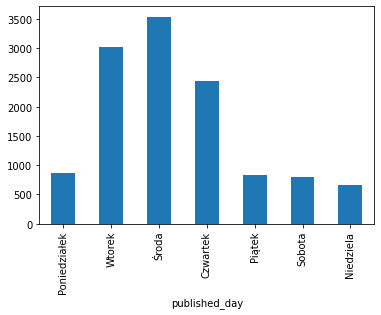

In [98]:
days = ["Poniedziałek", "Wtorek", "Środa", "Czwartek", "Piątek", "Sobota", "Niedziela"]

df_copy = df_copy.groupby(['published_day']).size().reindex(days) 


df_copy.plot(x=df_copy[0], y=df_copy[1], kind="bar")